# Introducción

En esta práctica vamos a examinar un conjunto de datos que contiene información biométrica y de salud, con el fin de determinar la presencia o ausencia del hábito de fumar en los individuos a partir de señales bio-saludables. El archivo smoking.csv que utilizaremos incluye características diferentes, tales como edad, peso, altura, niveles de glucosa en ayuno y colesterol, entre otros.

Este análisis nos permitirá aplicar y profundizar en técnicas de Machine Learning como SVM y kNN, así como en métodos de ingeniería de características, esenciales para la preparación y optimización de los datos para la modelización. Abordaremos la transformación de variables numéricas y categóricas, y exploraremos cómo estos procesos afectan el rendimiento de los modelos predictivos.

Comenzaremos con una exploración de los datos para entender su estructura y las relaciones entre las diferentes variables. Posteriormente, prepararemos los datos para su análisis, aplicando técnicas de preprocesamiento y generando nuevas características que nos ayudarán a capturar la complejidad del conjunto de datos y a mejorar la precisión de nuestros modelos predictivos.

## El Dataset

El conjunto de datos con el que trabajaremos incluye una serie de atributos relacionados con la salud y mediciones biométricas. Aquí está la descripción de cada atributo y su posible asociación con el hábito de fumar:

* **ID**: Identificador único para cada individuo en el dataset. No tiene asociación directa con el hábito de fumar.
* **Gender**: Género del individuo, que puede tener variaciones en la prevalencia del hábito de fumar.
* **Age**: Edad del individuo, presentada en intervalos de 5 años. La prevalencia del hábito de fumar a menudo disminuye con la edad.
* **Height**: Altura en centímetros. No tiene una asociación directa con el hábito de fumar.
* **Weight**: Peso en kilogramos. El fumar puede influir en el peso y varía individualmente.
* **Waist**: Circunferencia de la cintura en centímetros. El fumar puede afectar la distribución de la grasa corporal.
* **Eyesight** (Left/Right): Medición de la agudeza visual para el ojo izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Hearing** (Left/Right): Medición de la audición para el oído izquierdo/derecho. No tiene asociación directa con el hábito de fumar.
* **Systolic BP**: Presión arterial sistólica. El fumar puede afectar la presión arterial.
* **Diastolic BP**: Presión arterial diastólica. El fumar puede afectar la presión arterial.
* **Fasting Blood Sugar**: Nivel de azúcar en sangre en ayuno. El fumar puede impactar los niveles de azúcar en sangre.
Cholesterol (Total): Nivel total de colesterol. El fumar puede influir en los niveles de colesterol.
* **Triglyceride**: Nivel de triglicéridos. El fumar puede influir en los niveles de triglicéridos.
* **HDL Cholesterol**: Nivel de colesterol HDL. El fumar puede disminuir los niveles de colesterol HDL.
* **LDL Cholesterol**: Nivel de colesterol LDL. El fumar puede influir en los niveles de colesterol LDL.
* **Hemoglobin**: Nivel de hemoglobina. No tiene asociación directa con el hábito de fumar.
* **Urine Protein**: Presencia de proteína en la orina. El fumar puede impactar la función renal.
* **Serum Creatinine**: Nivel de creatinina en suero. El fumar puede impactar la función renal.
* **AST/ALT**: Niveles de transaminasas glutámico oxaloacéticas. El fumar puede impactar la función hepática.
* **GTP**: Nivel de γ-GTP. El fumar puede impactar el nivel de enzimas hepáticas.
* **Oral Exam Status**: Estado del examen oral. El fumar puede impactar la salud oral.
* **Dental Caries**: Presencia de caries dentales. El fumar puede afectar la salud dental.
* **Tartar Status**: Estado del tártaro. El fumar puede afectar la salud dental.
* **Blood Group**: Grupo sanguíneo del individuo.
* **Smoking Status**: Indica si el individuo es fumador o no. Esta es la variable objetivo que indica directamente el hábito de fumar.

Es importante comprender estas asociaciones, ya que nos ayudarán a determinar qué características pueden ser más relevantes para nuestros modelos predictivos y cómo podríamos necesitar transformarlas para mejorar la precisión de nuestras predicciones.







# 0. Importación de librerías

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize




# 1. Exploración Inicial de Datos

**Ejercicio 1** - Declara el tamaño del dataset. Con respecto a las columnas, identifica qué variables son numéricas y cuáles son categóricas. ¿Cuál es el individuo menos pesado? ¿Y el más alto? Dibuja un histograma de hombres y mujeres atendiendo a si fuman o no.

In [3]:
df = read_csv('./habitos_fumadores.csv')
# demos un vistazo al dataset
df.head(3)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,A+
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,A-
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,0+


In [4]:
df.tail(3)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,1.0,0.5,17.0,11.0,12.0,Y,0,N,0,A-
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,1.0,0.7,20.0,19.0,18.0,Y,0,N,0,0+
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1,A-


In [5]:
# obtenemos numero de columnas y filas
df.shape

(55692, 28)

In [6]:
## observamos que el dataset tiene 55692 filas por 28 columnas, pasamos a identificar las variables númericas y categóricas
# obtengamos los tipos
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
blood_group             object
dtype: object

podemos ver que todos menos genero, oral, tartar y blood_group son numeros, 
siendo estos de tipo object (string en este caso) que categorizan a la fila, en si es hombre o mujer, 
el estado de la boca, del tartaro y el grupo sanguineo. Veamos quien es el que menos pesa

In [7]:
# ordenamos por peso y sacamos la primera fila
less_weight =df.sort_values('weight(kg)',ascending=True)
less_weight[0:1]

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
22126,27630,F,60,145,30,53.0,0.5,1.0,1.0,1.0,...,1.0,0.4,22.0,14.0,14.0,Y,0,N,0,0+


Observamos que el usuario con id 27630 es el que menos pesa, ¿quién es el más alto?

In [8]:
# ordenamos por altura, pero a la inversa y sacamos la primera fila
highest =df.sort_values('height(cm)',ascending=False)
highest[0:1]

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group
55625,55360,M,35,190,85,80.0,1.0,0.9,1.0,1.0,...,1.0,0.9,22.0,14.0,19.0,Y,0,Y,1,A-


Observamos que el usuario 55360 con 1.90cm es el más alto,  dibujamos un histograma de hombres y mujeres atendiendo a si fuman o no.

C:\Users\carlo\AppData\Local\Temp\ipykernel_26260\538579608.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(['Femenino', 'Masculino'])


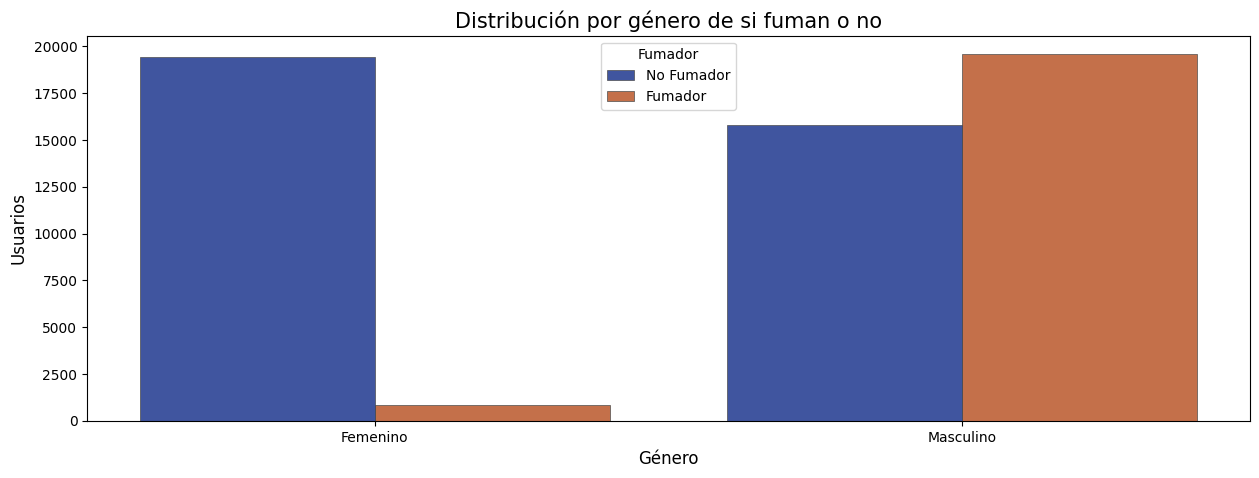

In [9]:
# para crear un hitograma en 
df_changed = df.copy()
df_changed['Fumador'] = df['smoking'].replace(0,"No Fumador").replace(1,"Fumador")
fig, subplots = plt.subplots(figsize=( 15, 5 ) )

# Create a histogram with seaborn
sns.histplot(data=df_changed, x="gender", hue="Fumador", multiple="dodge", shrink=.8, palette="dark", edgecolor=".3", linewidth=.5, ax=subplots)

# Set labels and title
subplots.set_xlabel('Género', fontsize=12)
subplots.set_ylabel('Usuarios', fontsize=12)
subplots.set_title('Distribución por género de si fuman o no', fontsize=15)
subplots.set_xticklabels(['Femenino', 'Masculino'])

plt.savefig("HyM_fumadores.png")
plt.show()


Como se puede observar en la figura anterior, Apenas hay mujeres en la muestra que fumen, al contrario que en el género másculino donde la mayoría son fumadores.             

**Ejercicio 2** - Sobre la variable continua "age" aplica una binarización por umbralización, tomando como umbral la media de las edades, incluyendo esta variable en el Dataframe como "age_bin". Haz un conteo de las dos categorías resultantes en la variable binarizada. Sobre la variable continua "Cholesterol" aplica una agrupación por cuantiles usando percentiles. Incluye esta variable en el dataframe como "Cholesterol_per".

In [10]:
media_edades = df['age'].mean()
df['age_bin']=np.where(df['age']<=media_edades, 'joven', 'mayor')
num = df['age_bin'].value_counts()

print(f"Hay {num['joven']} jovenes, y {num['mayor']} mayores")

df.head()

Hay 28847 jovenes, y 26845 mayores


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,blood_group,age_bin
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,0.7,18.0,19.0,27.0,Y,0,Y,0,A+,joven
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,0.6,22.0,19.0,18.0,Y,0,Y,0,A-,joven
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,21.0,16.0,22.0,Y,0,N,1,0+,mayor
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,19.0,26.0,18.0,Y,0,Y,0,A+,joven
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,0.6,16.0,14.0,22.0,Y,0,N,0,A-,joven


**Ejercicio 3** - Sobre la variable continua "fasting blood sugar" aplica un escalado máximo-mínimo. Dibuja un histograma de la variable original y otro histograma de la variable tras el escalado: ¿qué conclusiones sacas viendo ambos histogramas?

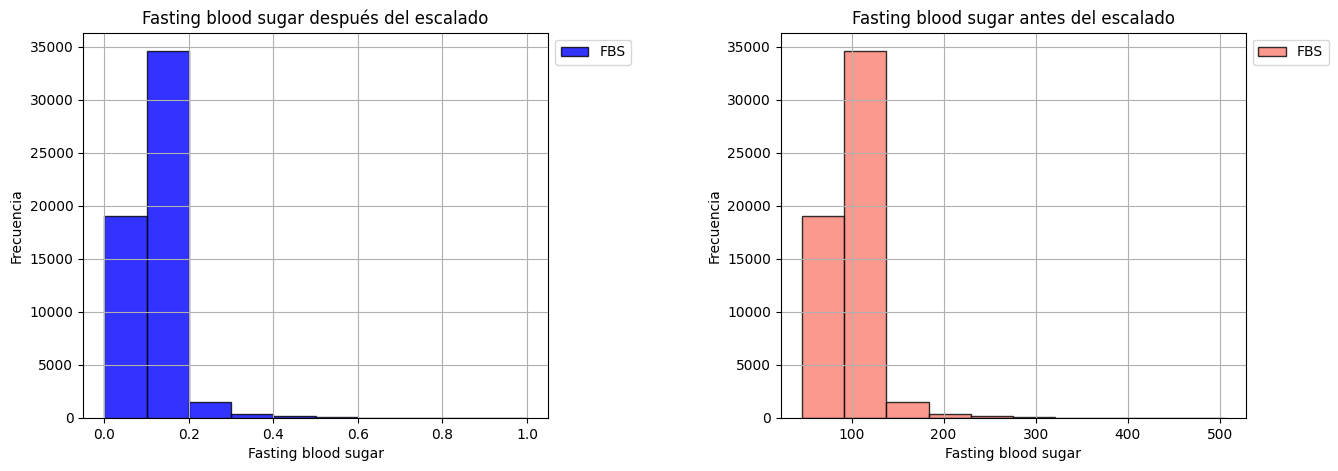

In [11]:
scaler = MinMaxScaler()

# convertimos en numericas todas las variables
df_fast_blood = read_csv('./habitos_fumadores.csv')
df_fast_blood['gender']=np.where(df_fast_blood['gender']=='M', 0, 1)
df_fast_blood['oral']=np.where(df_fast_blood['oral']=='M', 0, 1)
df_fast_blood['tartar']=np.where(df_fast_blood['tartar']=='M', 0, 1)
df_fast_blood['blood_group']=np.where(df_fast_blood['blood_group']=='0', 0,np.where(df_fast_blood['blood_group']=='A+', 1,
                            np.where(df_fast_blood['blood_group']=='B+', 2, np.where(df_fast_blood['blood_group']=='A-', 3, 
                            np.where(df_fast_blood['blood_group']=='B-', 4, -1)))))


scaler.fit(df_fast_blood)
df_fast_blood_mm = pd.DataFrame(scaler.fit_transform(df_fast_blood))

# Create 2 plots in order to have them side by side and easier to view
fig, subplots = plt.subplots( nrows=1, ncols=2, figsize=( 15, 5 ) )

# Histograma tras el escalado
subplots[0].hist( df_fast_blood_mm[12], bins=10, color='blue', alpha=0.8, edgecolor='black', label="FBS" )
subplots[0].set_title( "Fasting blood sugar después del escalado" )
subplots[0].set_xlabel( "Fasting blood sugar" )
subplots[0].set_ylabel( "Frecuencia" )
subplots[0].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[0].grid( True )

# Histograma sin haber sido escalado
subplots[1].hist( df["fasting blood sugar"], bins=10, color='salmon', alpha=0.8, edgecolor='black', label="FBS" )
subplots[1].set_title( "Fasting blood sugar antes del escalado" )
subplots[1].set_xlabel( "Fasting blood sugar" )
subplots[1].set_ylabel( "Frecuencia" )
subplots[1].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[1].grid( True )
plt.savefig( "FBS_Max_Min_escaler.png" )
plt.subplots_adjust( wspace=0.5 )
plt.show()

como se puede observar en la imagen, la distribución de la variable así com su frecuencia es la misma antes y dspuñes del escalado. (EXPLICAR AQUI QUE PASA)

**Ejercicio 4** - Aisla la variable discreta "blood_group" en un dataframe que se componga de esa única variable. Genera 3 dataframes diferentes:

*   Uno con variables generadas mediante el método one-hot encoding
*   Otro con variables generadas mediante el método dummy coding
*   Un último con variables generadas mediante el método effect coding



In [12]:
df_blood_goup = pd.DataFrame(df['blood_group'])
df_blood_goup.head(3)

,blood_group
0,A+
1,A-
2,0+


In [13]:
 ## Procedemos a crear el df usando one-hot encoding
df_encoded_oh = pd.get_dummies(df_blood_goup, columns = ['blood_group'])
df_encoded_oh.head(3)

,blood_group_0+,blood_group_A+,blood_group_A-,blood_group_B+
0,False,True,False,False
1,False,False,True,False
2,True,False,False,False


In [14]:
## ahora dummy coding
df_encoded_dc = df_encoded_oh.drop('blood_group_0+',axis=1)
## en casp de que los 3 sean falsos, significa que sería del grupo 0+
df_encoded_dc.head(3)

,blood_group_A+,blood_group_A-,blood_group_B+
0,True,False,False
1,False,True,False
2,False,False,False


In [15]:
##ahora aplicamos effect codding
df_encoded_ec = df_encoded_dc.copy()

all_zeros = (df_encoded_ec == 0).all(axis=1)

df_encoded_ec.loc[all_zeros, :] = -1
df_encoded_ec.head(3)

,blood_group_A+,blood_group_A-,blood_group_B+
0,True,False,False
1,False,True,False
2,-1,-1,-1


# 2. Preprocesamiento de Datos

**Ejercicio 5**: En esta sección, continuar con la preparación de nuestro conjunto de datos para el análisis. Basándose en las tareas realizadas anteriormente:

* **Limpieza de datos**: Revisarar los datos en busca de valores perdidos o atípicos (outliers) y decidir cómo manejarlos. Esto puede implicar técnicas como imputación, eliminación de registros o transformaciones.

* **División del conjunto de datos**: Segmentar los datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba.

In [16]:
# cargamos el dataset
df = read_csv('./habitos_fumadores.csv')

# comprobamos cuantos valores missing hay
for col in df.columns:
    print('La columna '+col+' tiene '+str(df[df[col].isna()].shape[0])+' missing')


La columna ID tiene 0 missing
La columna gender tiene 0 missing
La columna age tiene 0 missing
La columna height(cm) tiene 0 missing
La columna weight(kg) tiene 0 missing
La columna waist(cm) tiene 0 missing
La columna eyesight(left) tiene 0 missing
La columna eyesight(right) tiene 0 missing
La columna hearing(left) tiene 0 missing
La columna hearing(right) tiene 0 missing
La columna systolic tiene 0 missing
La columna relaxation tiene 0 missing
La columna fasting blood sugar tiene 0 missing
La columna Cholesterol tiene 0 missing
La columna triglyceride tiene 0 missing
La columna HDL tiene 0 missing
La columna LDL tiene 0 missing
La columna hemoglobin tiene 0 missing
La columna Urine protein tiene 0 missing
La columna serum creatinine tiene 0 missing
La columna AST tiene 0 missing
La columna ALT tiene 0 missing
La columna Gtp tiene 0 missing
La columna oral tiene 0 missing
La columna dental caries tiene 0 missing
La columna tartar tiene 0 missing
La columna smoking tiene 0 missing
La c

observamos que no hay valores missing en el dataset, comprobamos los outliers:

In [17]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


observando la media, los minimos y los máximos encontramos que podríamos tener outliers en age(media 44, max 85, min 20),  weight, eyesight(right y left), 
hearing(right y left), systolic, relaxation, fasting blood sugar, tryglyceride, HDL,  LDL, urine protein, serum creatinine, AST, ALT, GTP. Tras este pre analisis realizaremos un análisis de IQR para extraer la cantidad de outilers en cada columna:  

In [18]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking', 'blood_group'],
      dtype='object')

In [19]:
# creamos un dict de outliers donde meteremos la cantidad que hay en cada columna
outliers = {}

def detect_outliers(df, column):
    # obtenemos el Q1
    Q1 = df[column].quantile(0.25)
    # obtenemos el Q3
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # usando el IQR y los cuartiles, generamos los limites
    limite_abajo = Q1 - 1.5 * IQR
    limite_arriba = Q3 + 1.5 * IQR
    outlier = df[(df[column] < limite_abajo) | (df[column] > limite_arriba)]
    return outlier

# columnas que hemos detectado previamente que pueden tener outliers
columnas_a_analizar = ["age", "weight(kg)", "eyesight(right)", "eyesight(left)", "systolic", "relaxation", "fasting blood sugar",
                       "triglyceride", "HDL", "LDL", "Urine protein", "serum creatinine", "AST", "ALT", "Gtp"]

for columna in columnas_a_analizar:
        outliers[columna] = detect_outliers(df, columna)

# Cantidad de outliers en cada columna
outliers_count = {col: len(outliers) for col, outliers in outliers.items()}
outliers_count

{'age': 295,
 'weight(kg)': 198,
 'eyesight(right)': 1357,
 'eyesight(left)': 1314,
 'systolic': 685,
 'relaxation': 706,
 'fasting blood sugar': 3298,
 'triglyceride': 2256,
 'HDL': 1011,
 'LDL': 634,
 'Urine protein': 3093,
 'serum creatinine': 3147,
 'AST': 3699,
 'ALT': 3710,
 'Gtp': 5019}

Para tratar estos outliers, procederemos a usar Winsorización o capping, es decir; en vez de eliminar los datos, simplemente sustituiremos los valores de los outliers por un valor específico dentro del percentil. Es decir; los valores que estén por encima del 95% se sustituyen por el 95%, y los calores por debajo del 5% se sutituyen por el 5%, de esta manera buscamos no perder información y datos, reducir el impacto de los outliers sobre el modelo. 

In [20]:
# aplicamos winsorize a las columnas

# se podría ajustar los límites, en función del rendimiento del modelo, demomento probaremos con 
# estos, ya que se eliminan todos los outliers

columnas_a_0_0_5 = ["age", "weight(kg)", "eyesight(right)", "eyesight(left)", "systolic", "relaxation",
                       "triglyceride", "HDL", "LDL", "Urine protein", "serum creatinine", ]

columnas_a_0_10 = ["fasting blood sugar", "AST", "ALT", "Gtp"]

columnas_sin_windsr = [ "hearing(right)", "hearing(left)" ]


winsorized_data = df.copy()
for col in columnas_a_0_0_5:
    winsorized_data[col] = winsorize(df[col], limits=[0.05, 0.05])

for col in columnas_a_0_10:
    winsorized_data[col] = winsorize(df[col], limits=[0.1, 0.1])

df = winsorized_data
for columna in columnas_a_analizar:
        outliers[columna] = detect_outliers(df, columna)

# Podemos observar que hemos eliminado los outliers
outliers_count = {col: len(outliers) for col, outliers in outliers.items()}
outliers_count

e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
e:\AI-techniques-classification\.venv\lib\site-packages\numpy\lib\function_base.py:47

{'age': 0,
 'weight(kg)': 0,
 'eyesight(right)': 0,
 'eyesight(left)': 0,
 'systolic': 0,
 'relaxation': 0,
 'fasting blood sugar': 0,
 'triglyceride': 0,
 'HDL': 0,
 'LDL': 0,
 'Urine protein': 3093,
 'serum creatinine': 0,
 'AST': 0,
 'ALT': 0,
 'Gtp': 0}

# 3. Análisis Exploratorio de Datos (EDA)

**Ejercicio 6**: Explorar profundamente los datos para obtener insights que guíen la construcción del modelo:

* **Distribución de variables**: Utilizar visualizaciones para entender cómo están distribuidas las diferentes características y su relación con la variable objetivo.

* **Relaciones y correlaciones**: Investigar qué características tienen una relación significativa con la variable objetivo y si hay colinealidades que se deban considerar.

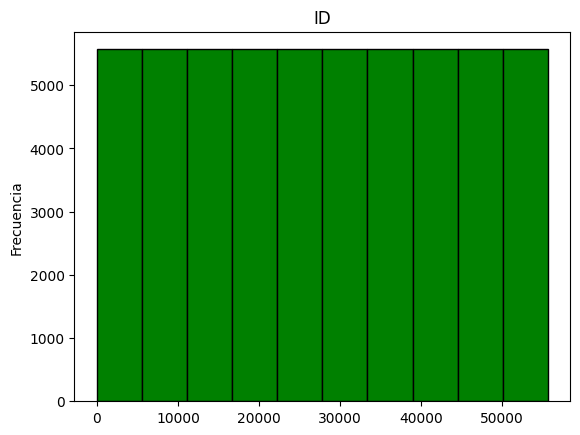

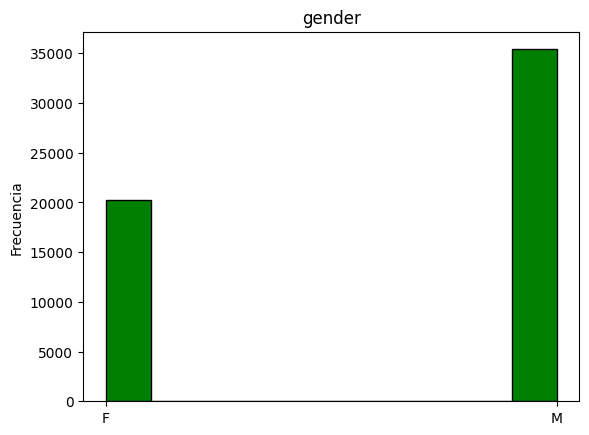

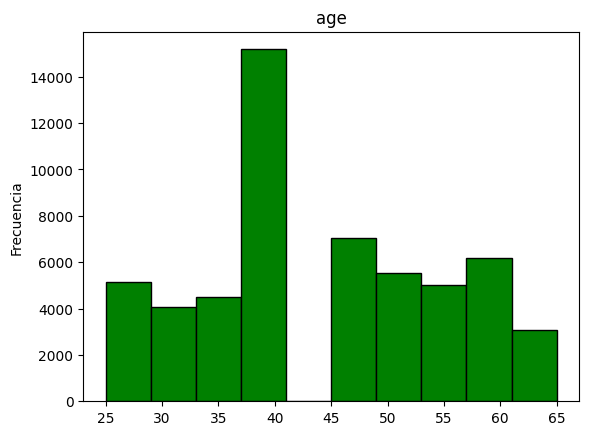

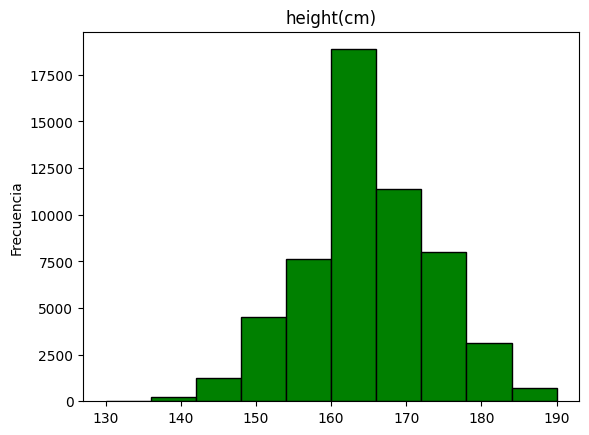

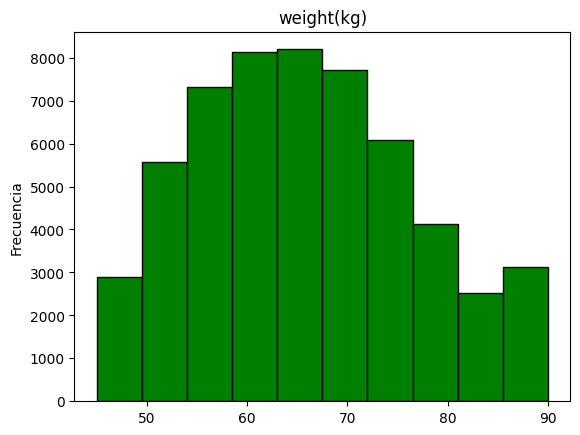

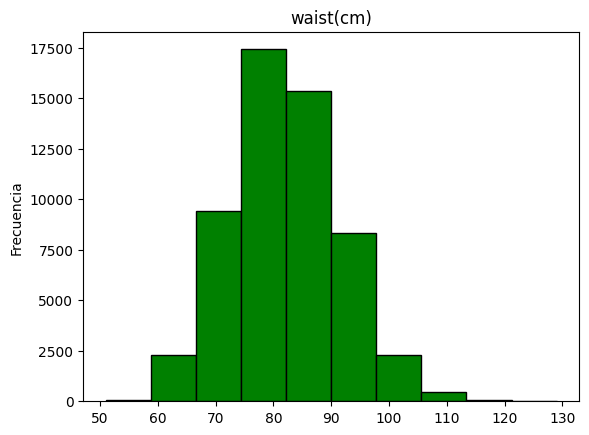

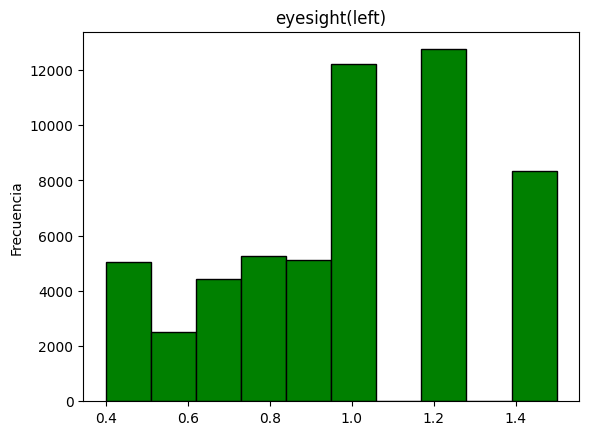

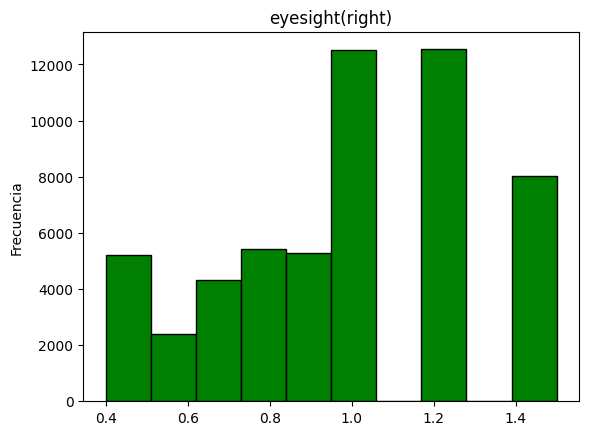

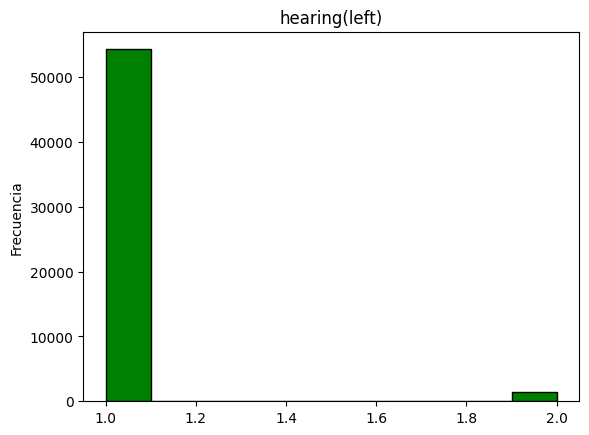

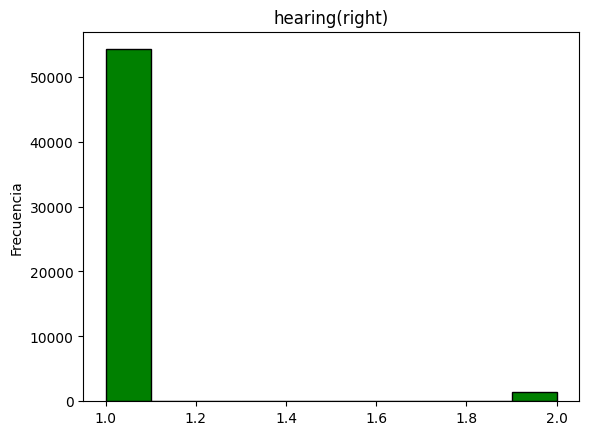

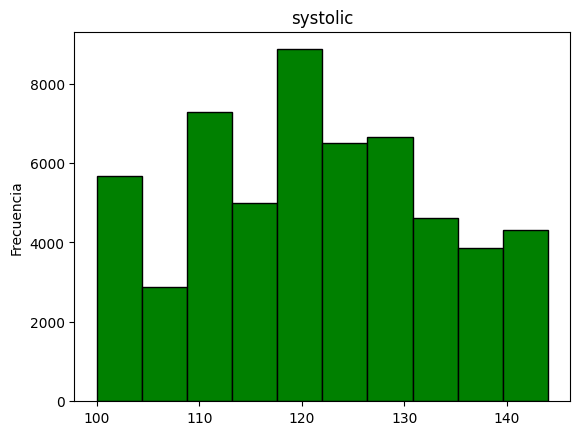

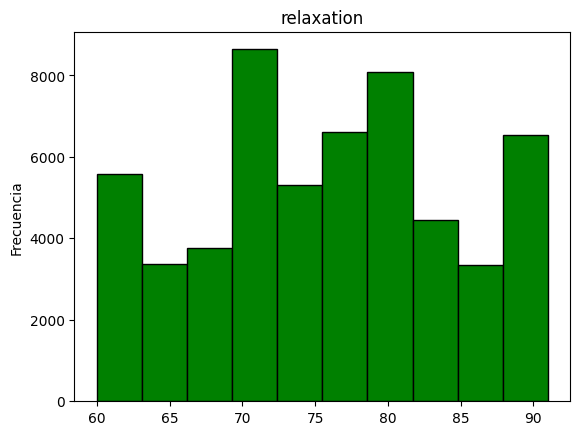

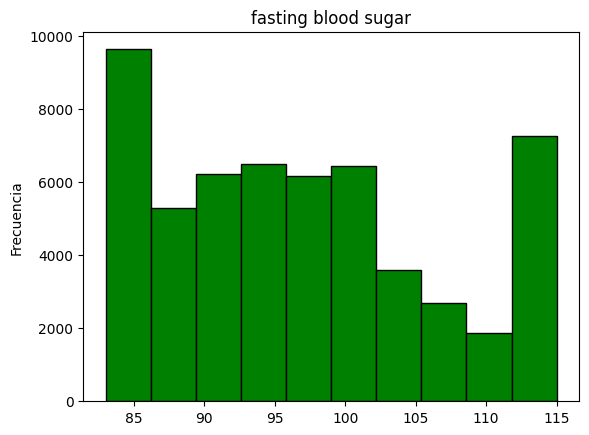

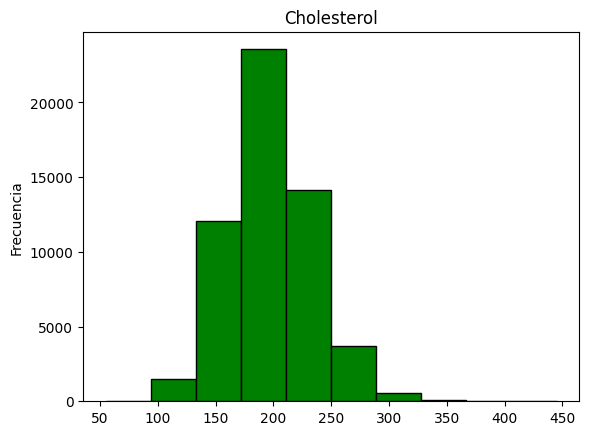

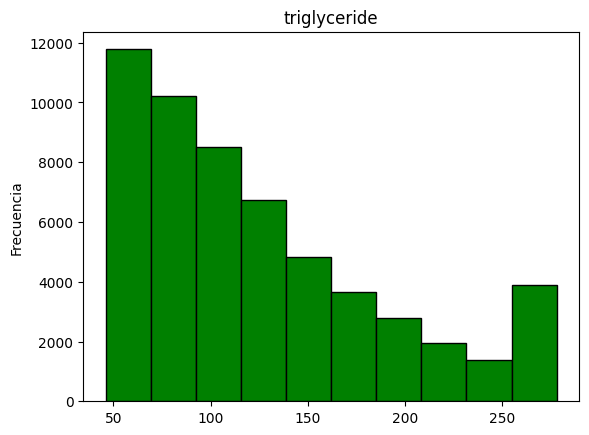

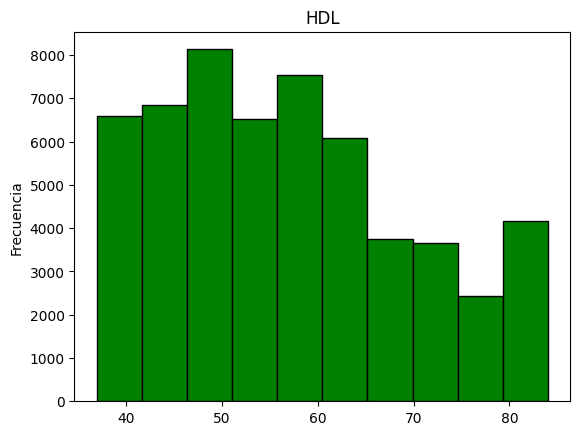

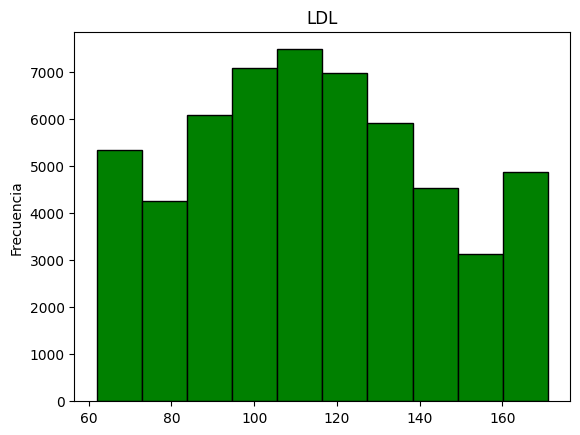

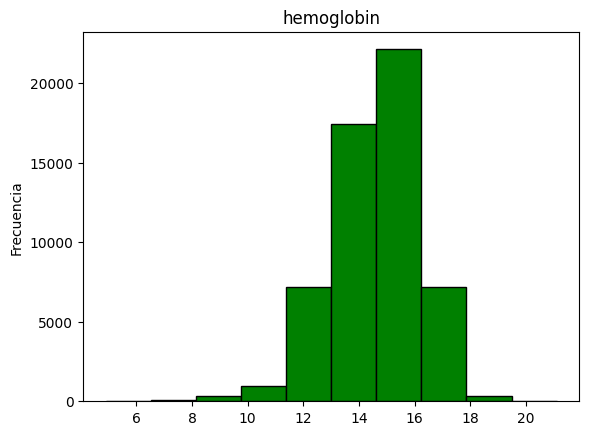

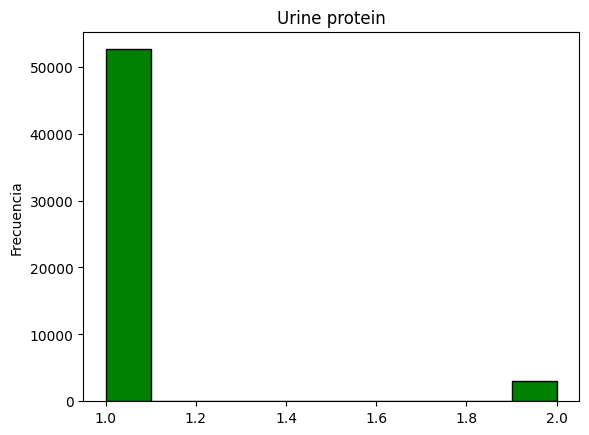

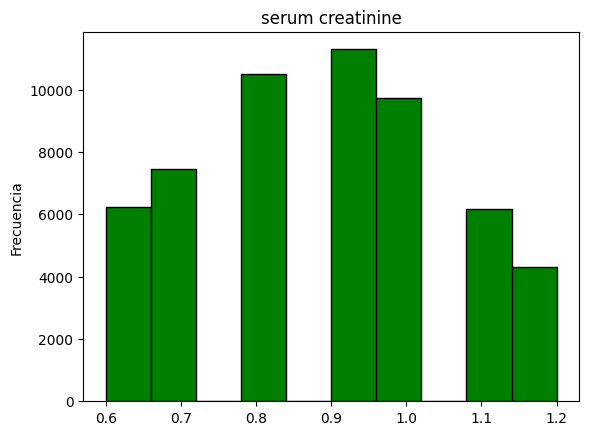

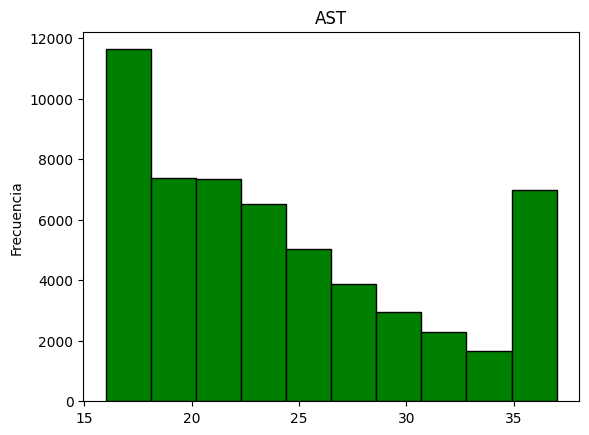

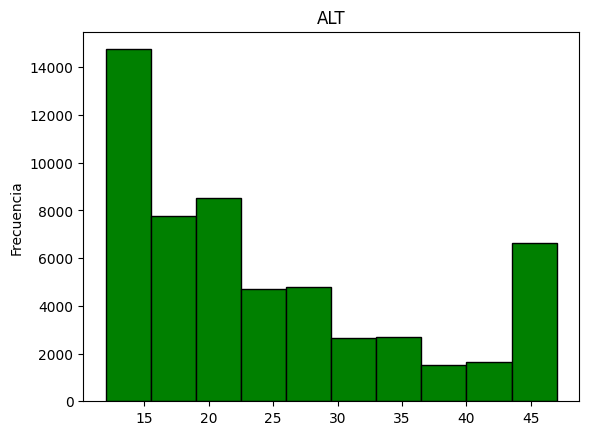

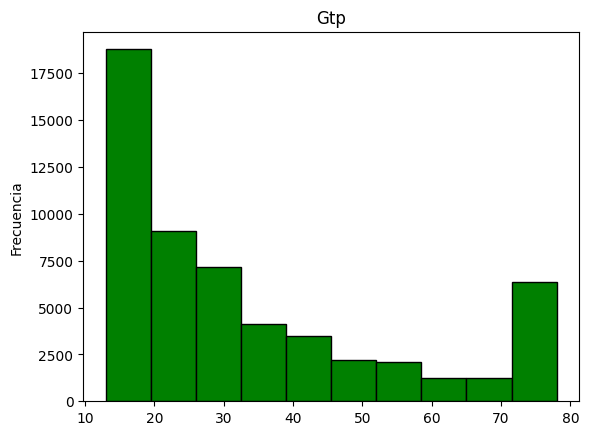

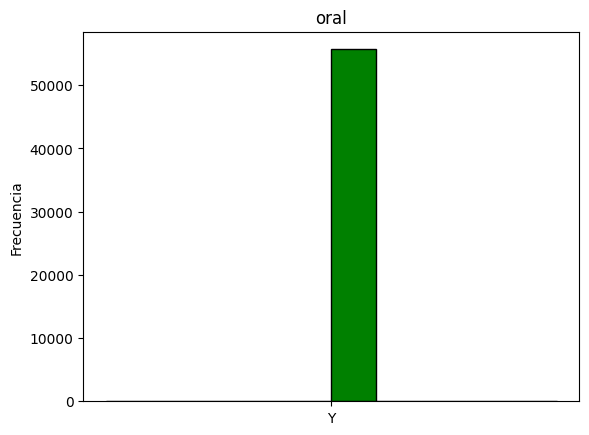

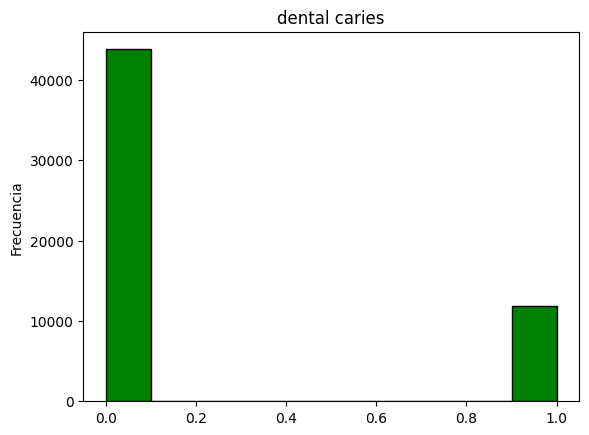

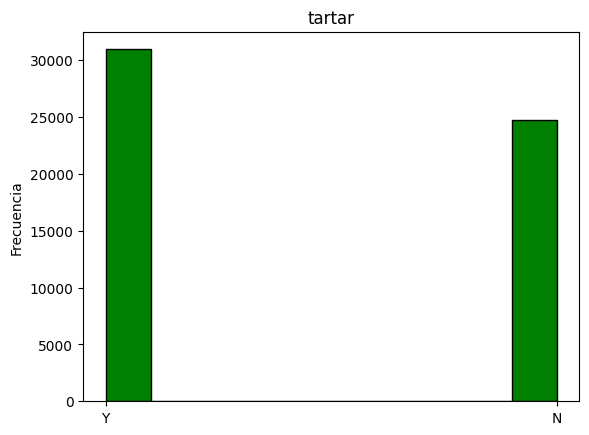

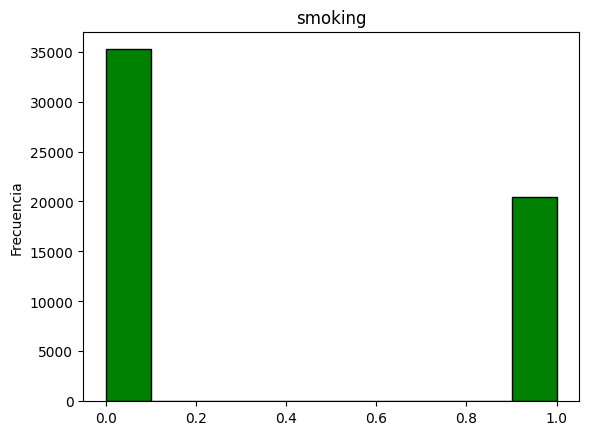

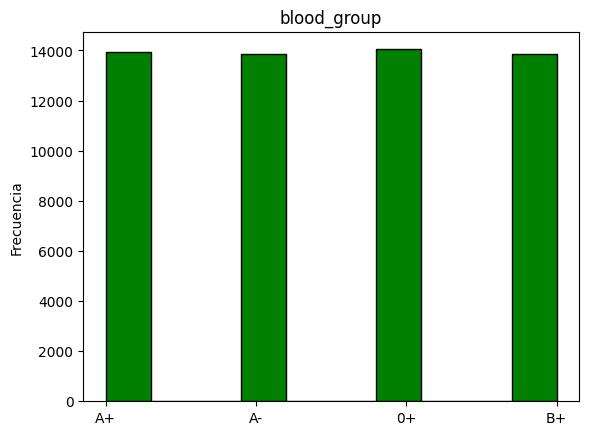

In [21]:
for col in df.columns:
    plt.hist(df[col], edgecolor='black', color= 'green')
    plt.title(col)
    plt.ylabel('Frecuencia')
    plt.show()

con estos gráficos podemos concluir que ya apenas existen outliers en el dataset, salvo en Hearing, o Urine protein, donde más que outliers, por los valores que se utilizan, se podría indicar que existe una descompensación en la cantidad de datos. Del mismo modo, en  otras gráficas como ALT, podemos observar que el último intervalo tiene una mayor cantidad que los precedentes, y esto se debe por como hemos tratado los outliers, aquellos valores que estában fuera del rango, se han ajustado al límite. Luego también podemos observar otras variables categóricas donde no hemos aplicado ninguna transformación, pero se puede observar una descompensación en los datos como Dental Caries. 

Procedemos a analizar las correlaciones entre los datos

In [22]:
df.corr()

ValueError: could not convert string to float: 'F'

# 4. Selección de Características

**Ejercicio 7**: Evaluar y seleccionar las características más informativas para el modelo:

* **Determinación de características relevantes**: Evaluar la importancia de cada variable en la predicción y justificar su inclusión o exclusión.

# 5. Construcción del Modelo

**Ejercicio 8**: Elegir y aplicar el modelo de clasificación adecuado a partir de las opciones vistaas en clase (SVM o kNN):

* **Entrenamiento**: Capacitar el modelo seleccionado con el conjunto de entrenamiento.


# 6. Evaluación del Modelo

**Ejercicio 9**: Evaluar el rendimiento del modelo es clave para entender su efectividad. Se incluye:

* **Comparación de métricas**: Observar y analizar métricas de rendimiento vistas en clase (como precisión, recall y matriz de confusión, etc)

* **Validación cruzada**: Utilizar la validación cruzada para optimizar hiperparámetros y confirmar la estabilidad del modelo.

# 7. Interpretación de Resultados y Conclusiones

**Ejercicio 10**: Interpretar los coeficientes del modelo y analizar los errores para comprender la influencia de cada característica y cómo mejorar el modelo.